# Simple Linear Regression

One way to think about linear regression is that it fits the "best line" through a graph of data points. Another way to look at it is that linear regression fits a simple model to the data to determine the most likely values of the parameters that define that model (slope and intercept).

## Linear regression results

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import pingouin as pg
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# example data from the book, page 319
insulin_sensitiv = np.array([250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375])
C2022_fatacids = np.array([17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4])

#### scipy.stats

In [4]:
res = stats.linregress(x=C2022_fatacids, y=insulin_sensitiv)
print(res)

LinregressResult(slope=37.20774574745539, intercept=-486.54199459921034, rvalue=0.7700025428371727, pvalue=0.002077012151479462, stderr=9.295940157270161, intercept_stderr=193.71602138413147)


The best-fit value for the **slope** is 37.2, this means that when %C20-22 increased by 1.0, the average insulin sensitivity is expected to increase by 37.2 mg/m²/min.

Although the CI is fairly wide, it does not include zero, which is a strong evidence that the observed relationship between lipid content of the muscles and insulin sensitivity is very unlikely to be a coincidence of random sampling.

The **intercept** is the value of the insulin sensitivity when the %C20-22 equals zero. For this example, the Y-intercept is not a scientifically relevant value, because extrapolating bacl to zero is not helpful and negative values for insulin sensitivity are not biologically possible. In conclusion, these results tell us that the linear model cannot be correct when extrapolated way beyond the range of the data.

#### pingouin

In [5]:
lm = pg.linear_regression(X=C2022_fatacids, y=insulin_sensitiv)
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-486.542,193.716,-2.512,0.029,0.593,0.556,-912.908,-60.176
1,x1,37.208,9.296,4.003,0.002,0.593,0.556,16.748,57.668


The **R²** value (noted as either r² or R² for linear regression, and R² exclusively for non-linear and multiple regressions) quantifies the **goodness of fit** and means that 59% of all variance in insulin sensitivity can be accounted for the linear regression model, and the remaining 41% of the variance may be caused by other factors, measurement errors, biological variation, or a nonlinear relationship between insulin sensitivity and %C20-22.

For the **P value**, with linear regression the null hypothesis is that there really is no linear relationship between the 2 groups of data. If H0 were true, the best-fit line in the overall population would be horizontal with a slope of zero. The P value answers the question, if that null hypothesis was true, what is the chance that linear regression of data from a random sample of subjects would have a slope as far (or farther) from zero as that which is actually observed? In this example, the P value = 0.0021 is tniy, so we conclude that the null hypothesis is very unlikely to be true and that the observed relationship is unlikely to be caused by a coincidence of random sampling.

In [6]:
# returns results as a dictionnary instead of a dataframe
pg.linear_regression(X=C2022_fatacids, y=insulin_sensitiv, as_dataframe=False)

{'names': ['Intercept', 'x1'],
 'coef': array([-486.5419946 ,   37.20774575]),
 'se': array([193.71602138,   9.29594016]),
 'T': array([-2.51162496,  4.00258017]),
 'pval': array([0.02890283, 0.00207701]),
 'r2': 0.5929039159757126,
 'adj_r2': 0.5558951810644137,
 'CI[2.5%]': array([-912.90808294,   16.74751941]),
 'CI[97.5%]': array([-60.17590626,  57.66797208]),
 'df_model': 1,
 'df_resid': 11,
 'residuals': array([  70.52334572,   25.64024742,  -49.35975258,  -83.08052715,
          31.91947285,  -65.0544695 ,   61.22475593,   75.4131373 ,
          41.69236273,  -75.74918642, -102.95693217,  116.11454751,
         -46.32700164]),
 'X': array([[ 1. , 17.9],
        [ 1. , 18.3],
        [ 1. , 18.3],
        [ 1. , 18.4],
        [ 1. , 18.4],
        [ 1. , 20.2],
        [ 1. , 20.3],
        [ 1. , 21.8],
        [ 1. , 21.9],
        [ 1. , 22.1],
        [ 1. , 23.1],
        [ 1. , 24.2],
        [ 1. , 24.4]]),
 'y': array([250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 27

In [7]:
# many more options e.g. remove_na
pg.linear_regression(X=C2022_fatacids, y=insulin_sensitiv, remove_na=True, coef_only=True)

array([-486.5419946 ,   37.20774575])

In [8]:
# weighted linear regression
w = [1]*len(C2022_fatacids)
pg.linear_regression(X=C2022_fatacids, y=insulin_sensitiv, weights=w, coef_only=True)

array([-486.5419946 ,   37.20774575])

### statsmodels

There is no R (or statsmodels)-like summary table in scipy.stats or sklearn-learn. Instead, there is statsmodels.regression.linear_model.OLS method.

In [9]:
y = insulin_sensitiv
X = sm.add_constant(C2022_fatacids)
results = sm.OLS(y, X).fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.556   
Dependent Variable: y                AIC:                151.2840
Date:               2021-07-26 09:59 BIC:                152.4139
No. Observations:   13               Log-Likelihood:     -73.642 
Df Model:           1                F-statistic:        16.02   
Df Residuals:       11               Prob (F-statistic): 0.00208 
R-squared:          0.593            Scale:              5760.1  
------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
const    -486.5420  193.7160  -2.5116  0.0289  -912.9081  -60.1759
x1         37.2077    9.2959   4.0026  0.0021    16.7475   57.6680
-----------------------------------------------------------------
Omnibus:              3.503        Durbin-Watson:           2.172
Prob(Omnibus):        

In [145]:
import statsmodels.formula.api as smf  # possible to use R-like formula with a dataframe

df = pd.DataFrame(
    data={'pct_C2022':        C2022_fatacids,
         'insulin_sensitivity':insulin_sensitiv})

model = smf.ols(formula='insulin_sensitivity ~ pct_C2022', data=df)
# use formula='insulin_sensitivity ~ pct_C2022 +0' to removing the intercept, i.e. with categorical data

results_model = model.fit()
print(results_model.summary())

                             OLS Regression Results                            
Dep. Variable:     insulin_sensitivity   R-squared:                       0.593
Model:                             OLS   Adj. R-squared:                  0.556
Method:                  Least Squares   F-statistic:                     16.02
Date:                 Mon, 26 Jul 2021   Prob (F-statistic):            0.00208
Time:                         16:11:33   Log-Likelihood:                -73.642
No. Observations:                   13   AIC:                             151.3
Df Residuals:                       11   BIC:                             152.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -486.5420    193.716     -2.51

The first panel gives you an overview of the fit quality:
* You recognize the good old $R^2$ and $R_a^2$
* The F-statistic and its associated P-value test the hypothesis that all the coefficients are 0 (normality assumption)
* You should also recognize the log-likelihood (normality assumption)
* AIC and BIC respectively Aikike Information Criterion and Bayesian Information Criterion are equivalent of likelihood but that you can use to compare non nested models.

The second panel is quite self explanatory, just be careful with this t-test which again makes the assumption that errors are normally distributed, same for the standard error and the 95% confidence interval.

The third panel is a summary of a few statistical tests that will give you a sense of how all of the hypothesis needed for OLS are plausible:
* Omnibus and Prob(omnibus): this is a test for normality of residuals. Low P-values means that your linear model is not adapted
* Durbin-Watson : tests autocorrelation in the error terms (2 is no autocorrelation, less than 1 is bad)
* Jarque-Bera: tests if the skewness and kurtosis of your errors are looking like a normal distribution. If the Pvalue is high then they look normal.
* Condition Number : sensibility to noise of the fit.Skewness and kurtosis of your noise (both 0 for normally distributed noise).

#### Get more from the result table generated by statsmodels

In [74]:
from IPython.core.display import HTML
HTML(results.summary().tables[0].as_html())

C:\Users\WIECKOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Dep. Variable:,y,R-squared:,0.593
Model:,OLS,Adj. R-squared:,0.556
Method:,Least Squares,F-statistic:,16.02
Date:,"Mon, 26 Jul 2021",Prob (F-statistic):,0.00208
Time:,13:52:11,Log-Likelihood:,-73.642
No. Observations:,13,AIC:,151.3
Df Residuals:,11,BIC:,152.4
Df Model:,1,,
Covariance Type:,nonrobust,,


In [75]:
print('the parameters of the model', results.params)
print('loglikelihood model insulin_sensitivity ~ pct_C2022:', results.llf)

the parameters of the model [-486.5419946    37.20774575]
loglikelihood model insulin_sensitivity ~ pct_C2022: -73.64199323217251


### numpy polyfit

In [32]:
np.polyfit(C2022_fatacids, insulin_sensitiv, deg=1)

array([  37.20774575, -486.5419946 ])

### scikit-learn

In [34]:
model = LinearRegression(fit_intercept=True).fit(C2022_fatacids.reshape(-1,1), insulin_sensitiv.reshape(-1,1))
print(model.coef_)
print(model.intercept_)

[[37.20774575]]
[-486.5419946]


## R-squared

In [73]:
Rsq = res.rvalue**2
print(f"R²: {Rsq}")

R²: 0.592903915975712


59% of all variance in insulin sensitivity can be accounted for the linear regression model and the remaining 41% of the variance may be caused by other factors, measurement errors, biological variation or a nonlinear relationship between both parameters.

R² equals the difference of total sum of squares (TSS) to residual sum of squares (RSS) divided by the TSS:

$$ R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} $$

In [93]:
def compute_rss(y_estimate, y): 
  return sum(np.power(y - y_estimate, 2)) 

def estimate_y(x, b_0, b_1): 
  return b_0 + b_1 * x

beta_0 = res.intercept
beta_1 = res.slope

rss = compute_rss(estimate_y(C2022_fatacids, beta_0, beta_1), insulin_sensitiv)

tss = np.sum(np.power(insulin_sensitiv - np.mean(insulin_sensitiv), 2))
print(f"R² using TSS and RSS: {(tss-rss)/tss:.4f}")

R² using TSS and RSS: 0.5929


## Visualization

### Diagnostic plots for linear regression

We can check if a model works well for data in many different ways. We pay great attention to regression results, such as slope coefficients, p-values, or R² that tell us how well a model represents given data. That’s not the whole picture though. **Residuals** could show how poorly a model represents data. Residuals are leftover of the outcome variable after fitting a model (predictors) to data and they could reveal unexplained patterns in the data by the fitted model. Using this information, not only could you check if linear regression assumptions are met, but you could improve your model in an exploratory way.

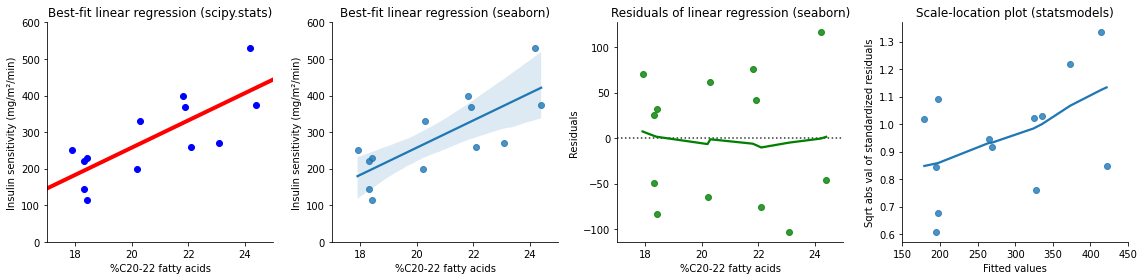

In [76]:
plt.figure(figsize=(16,4))

plt.subplot(141)
# plot the data points
plt.plot(C2022_fatacids, insulin_sensitiv, 'bo', linestyle='None')
plt.ylim(0,600)
# plot the regression line
x=np.array([17, 25])
plt.plot(x, res.slope*x + res.intercept, 'r-', lw=4)
plt.title('Best-fit linear regression (scipy.stats)')
plt.xlim((17, 25))
plt.xlabel('%C20-22 fatty acids')
plt.ylim(0,600)
plt.ylabel('Insulin sensitivity (mg/m²/min)')

plt.subplot(142)
sns.regplot(x=C2022_fatacids, y=insulin_sensitiv)
plt.title('Best-fit linear regression (seaborn)')
plt.xlim((17, 25))
plt.xlabel('%C20-22 fatty acids')
plt.ylim(0,600)
plt.ylabel('Insulin sensitivity (mg/m²/min)')

plt.subplot(143)
sns.residplot(x=C2022_fatacids, y=insulin_sensitiv, lowess=True, color="g") #Locally Weighted Scatterplot Smoothing
plt.title('Residuals of linear regression (seaborn)')
plt.xlim((17, 25))
plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Residuals')

plt.subplot(144)
# Preprocessing steps
model_norm_residuals = results.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# Create the scale-location plot
sns.regplot(x=results.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.title("Scale-location plot (statsmodels)")
plt.xlabel("Fitted values")
plt.xlim((150,450))
plt.ylabel("Sqrt abs val of standardized residuals")

sns.despine()
plt.tight_layout();

On the second graph, the shaded area show the 95% confidence bands of the regression line, which combine the CIs of the slope and the intercept. If the assumptions of linear regression are true, you can 95% sure that the overall best-fit regression line lies somewhere within the shaded confidence bands.

The curvature of the 95% CI bands simply is a way to enclose possible straight lines (see _boostrapping_).

Only a few data points are included within the confidence bands, if the sample was much larger, the best-fit line would be determined more precisely, so the confidence bands would be narrower and a smaller fraction of data points would be included within the confidence bands.

The **residual plot** shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship. If you find _equally spread residuals around a horizontal line without distinct patterns_, that is a good indication you don’t have non-linear relationships.

The **scale-location plot**, also called 'Spread-Location plot', shows if residuals are spread equally along the ranges of predictors. This is how you can check the assumption of equal variance (**homoscedasticity**). It’s good if you see a _horizontal line with equally (randomly) spread points_.

#### Residuals vs Leverage

**[Leverage](https://en.wikipedia.org/wiki/Leverage_(statistics)) and [influence](https://en.wikipedia.org/wiki/Influential_observation)** are important concepts for determining whether your model is overly affected by some unusual data points:

- leverage is a measure of how far away the independent variable values of an observation are from those of the other observations
- influential observation in an observation whose deletion from the dataset would noticeably change the result of the calculation

 Cook's distance or Cook's D is a commonly used estimate of the influence of a data point when performing a least-squares regression analysis.

In [77]:
summary_info = results.get_influence().summary_frame()
df['leverage'] = summary_info["hat_diag"]
df['cooks_dist'] = summary_info["cooks_d"]
print(df.sort_values(by='cooks_dist', ascending=False).head())

    pct_C2022  insulin_sensitivity  leverage  cooks_dist
11       24.2                  530  0.259088    0.552364
10       23.1                  270  0.162231    0.212685
3        18.4                  115  0.157350    0.132773
0        17.9                  250  0.195836    0.130740
12       24.4                  375  0.280599    0.101007


#### Q-Q plot

This plot shows if **residuals are normally distributed**. Do residuals follow a straight line well or do they deviate severely? It’s good if residuals are _lined well on the straight dashed line_.

C:\Users\WIECKOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


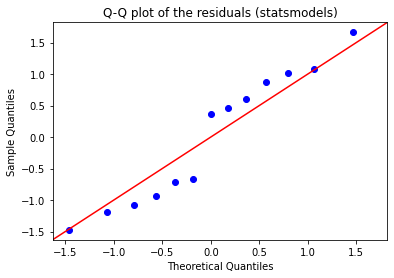

In [78]:
# create a Q-Q plot of the residuals
from statsmodels.api import qqplot
qqplot(results.resid, fit=True, line='45')
plt.title('Q-Q plot of the residuals (statsmodels)');

## Confidence interval

After your fitting, you would probably like to know the confidence interval for each of your estimated $\beta$, as well as if they are truly necessary (significantly different from zero). For both **you can't truly do anything without making an hypothesis about the statistic of the noise**: here comes the part where assuming your noise to be normally distributed ($N(0,\sigma^2)$) becomes important, but potentially wrong too.

For the confidence interval, if you have an infinite amount of data, and your noise distribution is not heavytailed, you can show that the estimators are well described by a normal statistic (there is convergence in the distribution so that $(\hat{\pmb\beta}-\pmb\beta)\rightarrow N(0,\sigma^2 (\pmb X^T \pmb X)^{-1})$). So for big amount of points relative to the number of estimated parameters, you are not making a big mistake by writting: $\beta_p \in [\hat{\beta_p} \pm z_{1-\frac{\alpha}{2}}\sqrt{\hat{\sigma}^2 [(\pmb X^T \pmb X)^{-1}]_{p,p}}]$.

If you don't have a huge amount of data you need to show that you have an incentive about your noise statistic to use these kind of confidence intervals.

For the significance of the coefficients, **if you know that your noise is normally distributed then you can use a t-test**.

It is possible to compute the CI using the SE stderr and the critical t ratio for a df of 13 - 2 (we know the slope AND intercept) and alpha = 95% (two-tailed).

In [95]:
alpha = .95
df = len(insulin_sensitiv) - 2
t_ = stats.t(df=df).ppf((1+alpha)/2)

In [96]:
CI_slope = (res.slope - t_*res.stderr,
           res.slope + t_*res.stderr)
print(f"Best-fit value of the slope: {res.slope:.2f} with 95% CI from {CI_slope[0]:.2f} to {CI_slope[1]:.2f}")

Best-fit value of the slope: 37.21 with 95% CI from 16.75 to 57.67


Although the CI is wide, it does not include 0 and doesn't even come close to 0. This is a strong evidence that the observed relationship is very unlikely to be a coincidence of random sampling.

### Computing the CI bands

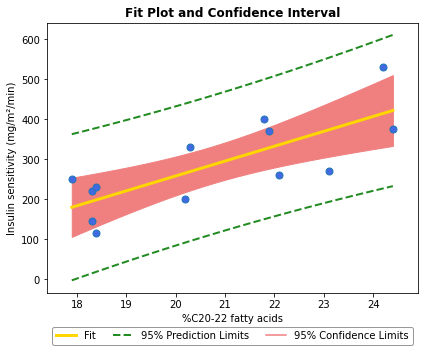

In [67]:
x,y = C2022_fatacids, insulin_sensitiv

def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.
    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}
    References
    ----------
    .. [1]: M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
    """

    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
    ax.fill_between(x2, y2+ci, y2-ci, color='lightcoral')
    
    return ax

def plot_ci_bootstrap(n, x, y, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.
    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.
    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers
    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html
    """

    if ax is None:
        ax = plt.gca()
    bootindex = np.random.randint
    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid)-1, len(resid))]
        # Make coeffs of for polys
        pc = np.polyfit(x, y + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(x, sp.polyval(pc, x), "b-", linewidth=2, alpha=3.0/float(nboot))
    return ax

# Modeling with Numpy
p, cov = np.polyfit(x, y, 1, cov=True)  # parameters and covariance from of the fit
y_model = np.polyval(p, x)              # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = y.size                              # number of observations
m = p.size                              # number of parameters
DF = n - m                              # degrees of freedom
t = stats.t.ppf((1+0.95)/2, n - m)      # used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid/y_model)**2)       # chi-squared; estimates error in data
chi2_red = chi2/(DF)                    # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2)/(DF))  # standard deviation of the error


# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6,5))

# Data
ax.plot(x, y, '.', markersize=14, markerfacecolor="royalblue")

# Fit
ax.plot(x, y_model, "-", color="gold", linewidth=3, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = np.linspace(np.min(y_model), np.max(y_model), 100)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(n, x, y, resid, ax=ax)

# Prediction Interval
pi = t*s_err*np.sqrt(1+1/n+(x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))   
ax.fill_between(x2, y2+pi, y2-pi, color="None", linestyle="--")
ax.plot(x2, y2-pi, "--", color="forestgreen", lw=2, label="95% Prediction Limits")
ax.plot(x2, y2+pi, "--", color="forestgreen", lw=2)


# Figure Modifications --------------------------------------------------------
# Labels
plt.title("Fit Plot and Confidence Interval", fontsize="12", fontweight="bold")
plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)')
plt.xlim(np.min(x)-.5,np.max(x)+.5)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
anyArtist = plt.Line2D((0,1), (0,0), color="lightcoral")  # Create custom artists
legend = plt.legend(
    [handle for i,handle in enumerate(handles) if i in (0,1)] + [anyArtist],
    [label for i,label in enumerate(labels) if i in (0,1)] + ["95% Confidence Limits"],
    loc=9, bbox_to_anchor=(0, -0.21, 1., .102), ncol=3, mode="expand")  
frame = legend.get_frame().set_edgecolor("0.5")

# Save Figure
plt.tight_layout();

## Bootstrapping

### Confidence Intervals

In [68]:
def draw_bs_pairs_linreg(x, y, size=10000):
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    for i in range(size):
        bs_inds=np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg=1)
    return bs_slope_reps, bs_intercept_reps

In [69]:
# numpy has also a least squares polynomial fit method
slope, intercept = np.polyfit(C2022_fatacids, insulin_sensitiv, deg=1)

In [70]:
bs_slope, bs_intercept = draw_bs_pairs_linreg(C2022_fatacids, insulin_sensitiv)

In [71]:
CI_slope_bs = np.percentile(bs_slope, [2.5, 97.5])
CI_intercept_bs = np.percentile(bs_intercept, [2.5, 97.5])
print(f"CI of the slope using bootstraping: {CI_slope_bs}")
print(f"CI of the intercept using bootstraping: {CI_intercept_bs}")

CI of the slope using bootstraping: [18.40060038 56.60632224]
CI of the intercept using bootstraping: [-879.34147463 -109.96156367]


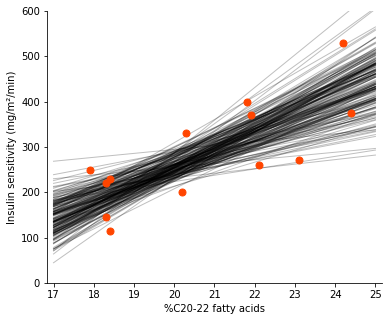

In [112]:
# plot the 200 first pairs of parameters
plt.figure(figsize=(6,5))
plt.ylim(0,600)
x=np.array([17, 25])

for i in range(200):
    plt.plot(x, bs_slope[i]*x + bs_intercept[i], 'k-', lw=1, alpha=.25)
# plot the real data points
plt.plot(C2022_fatacids, insulin_sensitiv, '.', ms=14, c='orangered', linestyle='None')

plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)')
plt.margins(.02)
sns.despine();

### P-value

In [113]:
print(f"P value: {res.pvalue:.4f}")

P value: 0.0021


H0: no linear relationship between both parameters. If H0 was true, the best-fit line would be **horizontal with a slope of zero**.
If H0 was true, what is the chance that linear regression of data from a random sample of subjects would have a slope as far or farther from zero as that which is observed?

In [140]:
# permutation of one group of values from the dataset, computation the slope 10000 times and estimatation of the P ratio
slope_bs = [
    stats.linregress(
        C2022_fatacids,                         # original X values
        np.random.permutation(insulin_sensitiv) # permuted Y values
    ).slope for _ in range(10000)
]

In [141]:
P_values_bs = np.sum(slope_bs >= res.slope) / 10000

In [142]:
print(f'P value from boostraping: {P_values_bs:.4f}')

P value from boostraping: 0.0016


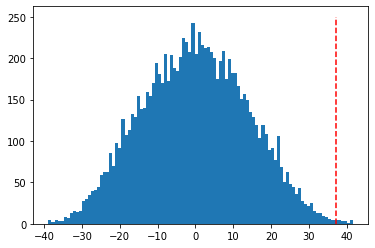

In [143]:
plt.hist(slope_bs, bins=100)
plt.vlines(res.slope, ymin=0, ymax=250, linestyle='--', colors='red');

## Fitting models to data

We measured a bunch of variables per individual, for many individuals. We are interested in the relationship between one of this variable that we will call the *response variable* ($Y$) and the other variables that we will call *covariables* ($X$). 
Of course our measurments are not perfect so there is some noise associated to it ($\epsilon$). We can rewrite the equation as $ \text{response} = \text{signal} + \text{noise}$.
In mathematical term we are interested in a class of problem that we can write as $ Y = f(X)+\epsilon$.

The model analyzed below defines insulin sensitivity (_the dependend variable_) as a function of of %C20-22 (_the independent variable_) and the slope and the intercept (_the parameters_), without true _constants_ here.

The function $f$ is called the regression function, and today we will be interested in looking at a particular form of those function: **linear combination**. A particular case of linear combination would be a single covariable with an intercept like $y_i=\beta x_i+c$.

In our example, the linear regression used to fit the model to the data wan be written as $ Y_i = \beta_0 + \beta_1.X_i + \epsilon_i $.
The **intercept** $\beta_0$ and **slope** $\beta_1$ are parameters that each have a single true underlyinh population value. In contrast, the **random component** $\epsilon$ of the model takes on a different value for each data point. These random values are assumed to follow a Gaussian distribution with a mean of zero.

A more general case would have more covariables and would be written like:

$$f(\textbf{X}_i,\pmb{\beta})=\sum_{p} \beta_p x_{i,p}= \textbf{X}_{i}^{T}\pmb{\beta}$$

Where *$X_i$* is a vector of p covariables associated to point individual i.

Note that for now nothing is said about the nature of the $x_{i,p}$, for example some could be constant instead of being a variable and thus you could go back to a more specific affine function (like $\beta x+c$).

So of course now the game become to best choose the vector of parameters $\pmb{\beta}$. For that there are two main methods (sorry Bayesian people...):
- Least Square fit
- Maximum Likelihood

Least square fit is the most intuitive and easy to get a hold on. Maximum likelihood is a bit more advanced in terms of the concepts it utilizes, but being introduce to it will allow you to manipulate cool concepts that you will need by the end of this notebook and if you keep learning about statistics in general. 

Underlying those different methods, there are different models:

- Linear models
- Generalized linear models

The way we wrote the function linking $Y$ to $X$ above, have the noise term $\epsilon$ outside of the function. So one would say that this function only try to represent the mean of the response variable $Y$ along the curve, and as importantly, it does it looking at linear function. 
This is what we actually do in the framework of Linear models: we only aim to fit the mean response using linear funcitons.

Generalized linear model, in another hand, are more flexible: they allow us to transform the mean response and to fit that transformed response with a linear model. It is very powerfull, as now we could better modeled response variable with broader properties (count data, categorical data etc....), but significantly more complicated and so we will not talk about those methods here.

### Least square

For clarity let's define once for all some variables: we have a sample of size $n$, for each individual on this sample there are $p+1$ measurments, $p$ covariables and one response variable. In the least square method we are interested in making the smallest overall distance error between our model and the response variable. Typically we want to find the $\beta$ that minimizes:

$S(\pmb\beta)=\sum_i (y_i-f(\textbf{X},\pmb{\beta}))^2=\sum_i \epsilon_i^2$

in mathematical terms you are looking for $\hat{\pmb\beta}=\text{arg min}_{\pmb\beta}S(\pmb\beta)$. Here the sum is over $i$, which counts the number of individuals.

> The hat $\hat{.}$, is a notation we use to denote our estimate of the true value of something. So in that sense $\hat{\pmb\beta}$ is the estimate of the "real" coefficient values, and $\hat{Y}$ is the estimation of $Y$ given by our model (also called the model predictions).

While we could use various optimization algorithms to find the best value for $\beta$, 
when the system is overdetermined (*i.e.*, you have more points than coefficients $\beta_i$) an analytical solution exists. It is of the form:

$$\hat{\pmb\beta}=(\pmb X^T \pmb X)^{-1}\pmb X^T \pmb Y$$

### Underlying hypothesis

There are a couple of important hypothesis behind this method:

- **Correct specification** : have a good incentive for the function you use
- **Strict exogeneity** : the errors are centered around the true value of y
- **No linear dependance** : you can not reconstruct one of your covariable by summing a subset of your covariables with some set of constant weights 
- **Spherical errors**: 
    - Homoscedasticity : the spread of the error is the same along the curve (for example not true for counts data).
    - No autocorrelation : error are not correlated along the curve.

**Normality is not strictly needed for Least Square fitting**, neither for the variables nor for their errors.
>The results of linear regression are based on the assumption that the **residuals** are Gaussian.

However you may need that hypothesis downstream in your analysis, for instance when using a test statistic. If you errors are normally distributed, then Least Square fitting and Maximum Likelihood are equivalent, showing that your method for choosing $\pmb\beta$ is efficient and sound.

If the points with high or low X values tend to be farther from the best-fit line, the assumption that the SD is the same everywhere (homoscedasticity) is violated. Therefore, linear regression can be calculated by **differentially weighting** the data points, giving more weight to the points with small variability and less weight to the points with lots of variability.

Finally, within that set of constraints and even if the method is called Linear Models, it is possible to fit polynomials of a degree bigger than 1. To do so you just have to precompute the monomials and add them to your set of covariables.

For example:
$y=\beta x +c$ is a linear combination of x

$y=\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}$ is still a linear combination of features (covariables) $x$, $x^{2}$ and $x^{3}$, and **X** becomes {$x,x^2,x^3$\}

### Goodness of fit

To have an idea of how good your fit is, you can either directly use the **Mean Squared Error (MSE)** or the adjusted coefficient of determination $\pmb R^2_a$.

The MSE is defined as follow:

$$\text{MSE}=\frac{\sum (y_i-\hat{y_i})^2}{n-2}$$ 

and accounts for what your model is missing. That could be the simple inherent variance induced by the noise term or the noise term and a missing term that your model doesn't take into account. By its nature, this metric makes it hard to compare between different hypothetical fitting models or different dataset.

A better normalized metric is the **adjusted coefficient of determination $\pmb R^2_a$**. 
The adjusted part is very necessary when we work in the context of multiple linear regression (more than one covariable). 

Let's start by defining the coefficient of determination $\pmb R^2$. This coefficient partitions the variance present in your data between what is taken into account by your model and what is not.

$R^2=1-\frac{\text{SSE}}{\text{SST}}$, where SSE is the sum of squared errors ($\sum_i (y_i-\hat{y_i})^2$) and SST in the sum of squares total ($\sum_i (y_i-\bar{y})^2$).

For the adjusted coefficient of determination you have to take into account that SSE and SST don't have the same degree of freedom and you should adjust for that.
$R^2_a=1-\frac{n-1}{n-p}(1-R^2)$, with $p$ the number of covariables and $n$ the number of individuals.

> Note : you can see that when there is only one covariable then $R^2_a = R^2$

#### Regularization

If you don't have access to the noise properties (*i.e.* you have no good reason to say it is normally distributed), you can always use a technic called regularization which is going to penalize covariables that are not really important to your fit. This is more on the machine learning side, and so a lot should be said about how to properly use  this technic (splitting your dataset between train, validation and test set, *etc.*). 
But let's just check what the principle behind it is and I will give an additionnal example on it later on.

The only thing that this method does is to add a penalization term to the least square minimization method seen before. 
This penalization is based on the size of the parameters estimated. 
The rational is that some time, parameters estimated will be inflated to compensate the fact that the covariable is not really important to fit the data, but is rather important to understand the noise. So regularization minimizes square error while balancing the overall size of the parameters.

Broadly, it can looks like that:

* $S(\pmb{\beta}) + \frac{1}{C}\Sigma^{n}_{i=1}|\beta_{i}|$ , l1 regularization (Lasso) C being the inverse of the weight that you put on that regularization 

* $S(\pmb{\beta}) + \frac{1}{C}\Sigma^{n}_{i=1}\beta_{i}^{2}$ , l2 regularization (Ridge) 

* $S(\pmb{\beta}) + \frac{1}{C}\Sigma^{n}_{i=1}(\alpha|\beta_{i}|+(1-\alpha)\beta_{i}^{2})$ , elasticnet

How to choose this C, or sometime $\alpha$, is related to the field of machine learning and has to do with splitting your data set into train, validation and test sets. We will not go deeper than that but statsmodels has it implemented `statsmodels.regression.linear_model.OLS.fit_regularized` and scikitlearn, a python library specialized in machine learning has even more option. 

This is really just for culture, there are many more things to learn before applying those technics rigorously.

### If hypotheses for OLS aren't true?

When the homoscedasticity of your data is not true you have a few possibilities:
- you can transform your data so your data become homoscedastic (for example you could use variance stabilizing transformation, or a simple log transform or other...)
- you can change your loss function that we previously called $S(\beta)$ to reweight the different members of that equation by taking into account the discrepancy in terms of variance. That only works if there is no correlation between the error terms. In that case the method is called Weighted Least Square and it simply transformed to $S(\pmb\beta)=\sum_i \frac{1}{\sigma_i^2} (y_i-f(\textbf{X},\pmb{\beta}))^2$.
- if there is a correlation between the different error terms then it becomes more complicated, but technics exist such as Generalized Least Square model

Finally if you know  what statistics your measurement follow, you can bypass all of those problems (and encounter others :-)) by using a maximum likelihood estimation rather than an LS method. By doing so you will have to put yourself in the framework of Generalized Linear Models.

### Maximum Likelihood Estimation

MLE is a method that is used to estimate parameters of a probablililty distribution, and is usefull for model choosing. It is done by maximizing the likelihood function. In the case that we are interested in (i.e. independant identically distributed) this likelihood function is simply the product of a density function values over the entire sample. It is a parametric method since it needs to have an a priory about the density function for it to work. Since it is a product, most of the time we would rather work with the log likelihood function which transforms this product into a sum.

So we would like to maximize $l$, the loglikelihood function, by choosing a set of parameters $\Theta$. Where $l$ is of the form $l(\Theta;Y)=\sum_i ln(p(y_i|\Theta))$, where $Y$ is a random variable and $p()$ is the density function associated to $Y$. So you want to find the following estimation for $\pmb\Theta$:

$$\hat{\pmb\Theta}=\text{arg max}_{\pmb\Theta}l(\pmb\Theta;Y)$$

Of note, the regression line determined by the OLS method is identical to the line determined by MLE calculations, i.e. given any hypothetical set of parameter values, it is possible to compute the chance of observing our particular data. MLE finds the set of parameter values for which the observed data are most probable. Given the assumption that scatter follows a Gaussian distribution (with a uniform SD), it can be proven that the MLE approach and the OLS approach generate identical results, i.e. _minimizing the sum of the squares finds values for the paramaters that are most likely to be correct._

Let's take the example of a gaussian where you would like to estimate the $\sigma$ and the $\mu$, given your data. As they are simulated data we chose that $\mu=2$ and $\sigma=0.5$:

the data that we observed [1.8851642783837905, 1.7856200844990953, 1.6464445818737299, 1.8496287121553703, 1.2273867250478512, 1.2592341350712677, 2.445644674058582, 1.8434341708498216, 3.0748040651361417, 1.8533629601600963]


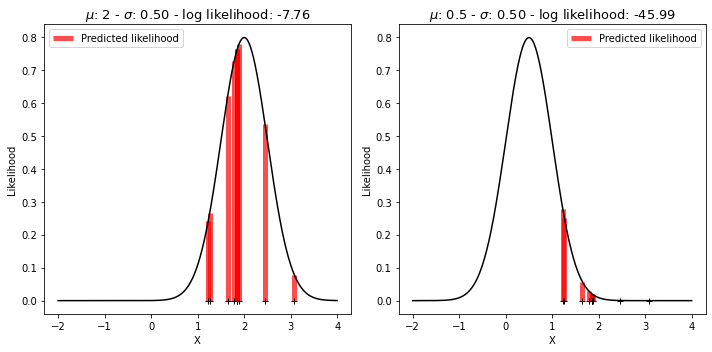

In [144]:
from matplotlib import collections  as mc

def gaussian_dist(x,mu,sigma):
    """ returns the probability of observing x in a normal distribution of mean mu and standard deviation sigma """
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-1./(2*sigma**2)*(x-mu)**2)
    # note: this is equivalent to stats.norm.pdf(x, mu, sigma)

X_small=np.random.randn(10)*0.5+2 # this is our observed data, with (mean=2, sd=0.5)

m=[2,0.5] # we will try 2 possible combinations of paramters (mean=2, sd=0.5) and (mean=0.5, sd=0.5) 
s=[0.5,0.5]


fig, ax = plt.subplots(ncols=len(m) , figsize = (10,5))
X_small_=[[v,0] for v in X_small]

x=np.arange(-2,4,0.005) # we will plot between -2 and 4

print('the data that we observed', [v[0] for v in X_small_])

for q in range(len(m)): # for each of the parameter combinations we want to try
    ax[q].plot(X_small,[0]*len(X_small),'k+') # we plot the observed data as crosses

    ax[q].plot(x, stats.norm.pdf(x, loc=m[q], scale=s[q]), 'k') # we plot the distribution we are testing
    
    Predicted = stats.norm.pdf(X_small, loc=m[q], scale=s[q])

    Predicted_= [i for i in zip(X_small,Predicted)] # this is to plot segments
    lc = mc.LineCollection(zip(X_small_,Predicted_) , colors='red',linewidths=5,alpha=0.7,label='Predicted likelihood')
    ax[q].add_collection(lc)
    ax[q].legend(loc='best',fontsize=10)
    
    # the log likelihood of this set of parameters is the sum of the log of the probability densities of the sample
    sum_like=sum(np.log(Predicted))     
    ax[q].set_title('$\mu$: {} - $\sigma$: {:.2f} - log likelihood: {:.2f}'.format(m[q],s[q],sum_like) ,fontsize=13)
    
    ax[q].set_xlabel('X')
    ax[q].set_ylabel('Likelihood')

plt.tight_layout();

Multiplying those red bars is exactly what the maximum likelihood does. Basically, you shift your theoritical distribution to the right or the left (trying different means), and you narrow it or widen it (trying different variances). For each of those try you multiply those red bars together, and the combination of parameters giving highest result is the one maximizing the likelihood of your data being produced by that distribution with those parameters.

It is important to point out here that **even when our data are actually coming from a certain distribution, there will (almost) always be a difference between the theoretical distribution and the recovered one**, as to have perfect match you would need an infinite number of data points.